In [2]:
%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

## CA energy data and Electric Vehicl (EV) projections
As discussed in minilab 9, in California, energy and environmental policy initiatives are driving electric grid changes. Key initiatives
include the following:
<li>33 percent of retail electricity from renewable power by 2020, and 50% renewable by 2030; <li>greenhouse gas emissions reduction goal to 1990 levels by 2020;<li>regulations in the next 4-9 years requiring power plants that use coastal water for cooling to either repower, retrofit or retire; <li>policies to increase distributed generation; and <li>an executive order for 1.5 million zero emission vehicles by 2025.

Sources: https://www.caiso.com/Documents/FlexibleResourcesHelpRenewables_FastFacts.pdf
    http://www.energy.ca.gov/renewables/tracking_progress/documents/renewable.pdf

These initiatives are great, but can provide some real challenges when it comes to implementation. Why?
1. For the grid to function correctly, the energy supplied must exactly equal the energy demand at all times. If energy generation does not equal demand, the grid can have failures and blackouts. 
2. Over generation is as bad as under generation. 
3. The grid does not deal well with large/rapid fluctuations in energy usage

Accurate predictions of demand and prediction of generation from renewable sources is crucial to stabilizing the grid. We have provided data on hourly energy demand for the state of California as well as solar and wind energy generation for the state for the month of March 2016 from [CA ISO](http://oasis.caiso.com/). In this minilab we will explore the energy datasets as well as **a week of simulated EV charging data from 2,220 EVs** and will explore some of the challenges with reaching the initiatives.


In [3]:
ca_energy_demand = Table.read_table('data/March2016_CA_energy_demand.csv')
solar = Table.read_table('data/March2016_CA_gen_solar.csv')
wind = Table.read_table('data/March2016_CA_gen_wind.csv')
EV_sim = Table.read_table('data/EV_charge_data.csv')
EV_sim

INDEX,hour,kW
3,3,0.927386
4,4,7.99758
5,5,26.8975
6,6,125.371
7,7,303.627
8,8,459.18
9,9,347.122
10,10,326.66
11,11,243.3
12,12,282.952


## Part 1 - visualizing a week of data
Last week you had to generate the following plots of CA energy demand and renewable generation. Now we will also look at simulatted EV charging patterns for 2,220 electric vehicles.

**Task:**<li>Add a plot of EV charging power required ('kW') vs. INDEX for the simulated EV data

**Questions:**<li>What is the maximum power used per hour for charging the 2,220 EVs? <li>What is the average weekly energy requirement per car? Remember that the EV_sim table is aggregating 2,220 EV users. <li>How does this compare to the average power consumption of other appliances, say a fridge for example? (you probably have to look this up) 



41.3723426111 kW-hours used in a week 0.246263944114 kW = average power


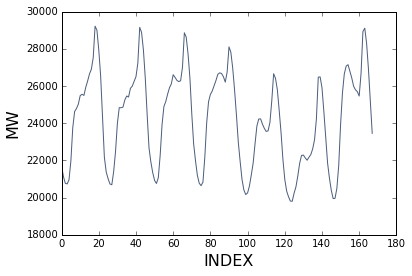

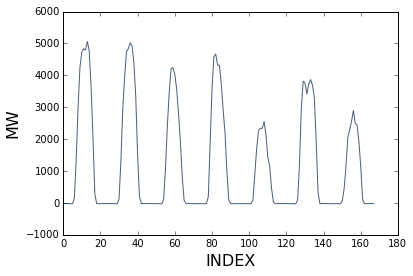

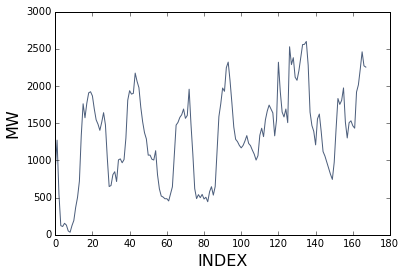

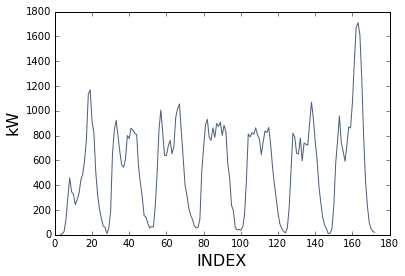

In [7]:
# Your code here
ca_energy_demand.take(range(24*7)).plot('INDEX', 'MW')
solar.take(range(24*7)).plot('INDEX', 'MW')
wind.take(range(24*7)).plot('INDEX', 'MW')

# Answer key:
EV_sim.plot('INDEX', 'kW')
week_kwh = np.sum(EV_sim['kW'])/2220

week_kw = week_kwh/(24*7)
print (week_kwh, 'kW-hours used in a week', week_kw, 'kW = average power')

In [ ]:
# Answer questions here!

## Plot mean hourly energy demand from EVs per vehicle
Last week we created the following plots on energy generation and demand. These plots are shown below.

**Task:**<li>For the simulted EV data group by hour and plot average charging power required **per vehicle** per hour over a typical day. Remember that there are 2,220 EVs in the data set.

**Questions:**<li> What hour of the day has the peak EV charging demand? 

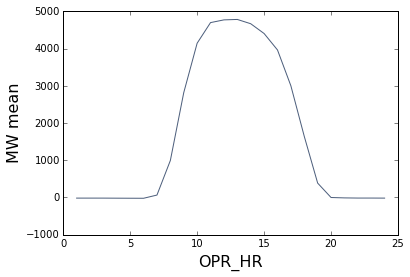

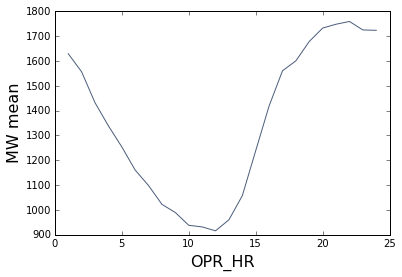

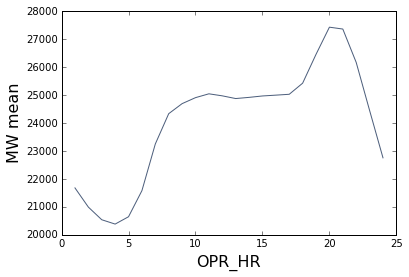

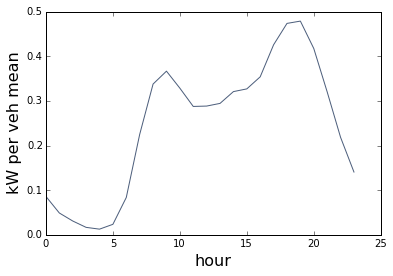

In [59]:
#Your code here
solar_avg_byhour = solar.group('OPR_HR',np.mean)
solar_avg_byhour.plot('OPR_HR', 'MW mean')

wind_avg_byhour = wind.group('OPR_HR',np.mean)
wind_avg_byhour.plot('OPR_HR', 'MW mean')

demand_avg_byhour = ca_energy_demand.group('OPR_HR',np.mean)
demand_avg_byhour.plot('OPR_HR', 'MW mean')

# Answer key
EV_sim['kW per veh'] = EV_sim['kW']/2220
EV_avg_byhour = EV_sim.group('hour', np.mean)
EV_avg_byhour.plot('hour', 'kW per veh mean')

## Plot the standard deviation of hourly energy demand from EVs per vehicle
In the last minilab we grouped by hour and plotted the standard deviation of renewable generation and demand per hour. 
**Task:** <li> Plot the standard deviation of EV charging power by hour.

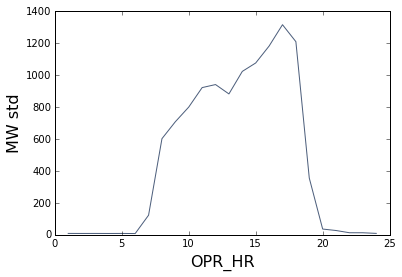

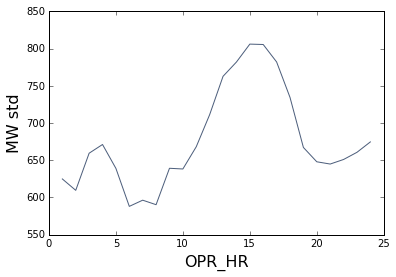

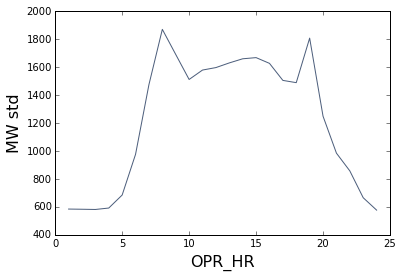

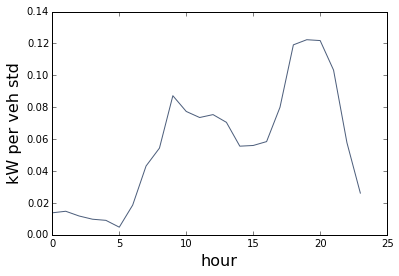

In [35]:
# Your code here
solar_std_byhour = solar.group('OPR_HR',np.std)
solar_std_byhour.plot('OPR_HR', 'MW std')

wind_std_byhour = wind.group('OPR_HR',np.std)
wind_std_byhour.plot('OPR_HR', 'MW std')

demand_std_byhour = ca_energy_demand.group('OPR_HR',np.std)
demand_std_byhour.plot('OPR_HR', 'MW std')

# Answer key:
EV_std_byhour = EV_sim.group('hour', np.std)
EV_std_byhour.plot('hour', 'kW per veh std')

## Mean +/- standard deviation
**Task**
1. Plot mean EV power required +/- standard devation per hour. (note you will have to use plt.plot to plot both + std and - std in the same graph).

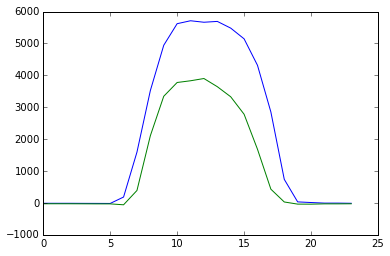

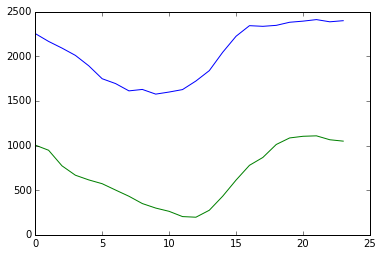

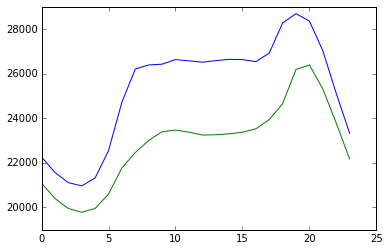

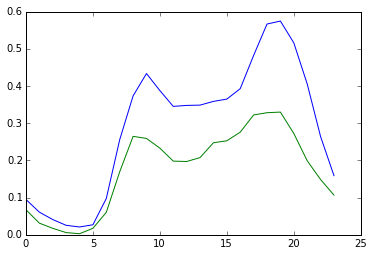

In [36]:
# Your code here
plt.plot(solar_avg_byhour['MW mean']+solar_std_byhour['MW std'])
plt.plot(solar_avg_byhour['MW mean']-solar_std_byhour['MW std'])

plt.figure()
plt.plot(wind_avg_byhour['MW mean']+wind_std_byhour['MW std'])
plt.plot(wind_avg_byhour['MW mean']-wind_std_byhour['MW std'])

plt.figure()
plt.plot(demand_avg_byhour['MW mean']+demand_std_byhour['MW std'])
plt.plot(demand_avg_byhour['MW mean']-demand_std_byhour['MW std'])


# Answer key
plt.figure()
plt.plot(EV_avg_byhour['kW per veh mean']+EV_std_byhour['kW per veh std'])
plt.plot(EV_avg_byhour['kW per veh mean']-EV_std_byhour['kW per veh std'])

## Forecasting demand
As mentioned above, CA has a goal of 1.5 million EVs on the road by 2025.

**Tasks:** <li> Create a column in the EV_avg_byhour table called 'MW 2025' containing the hourly demand if we have 1.5 million EVs in CA instead of the 2,220 that are shown in the table. Be careful with units. <li> Plot the 2025 EV demand. <li> Add a new column to the the demand_avg_byhour table called 'MW 2025' where you add the 1.5 million EV charging power consumption to today's demand. <li> Plot the total 2025 demand vs. hour of the day, where 2025 demand = today's demand + 2025 EV demand.


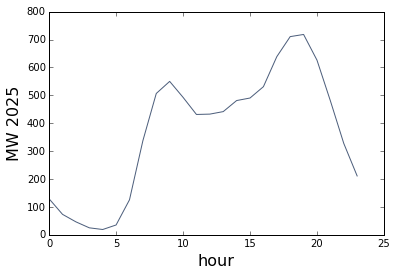

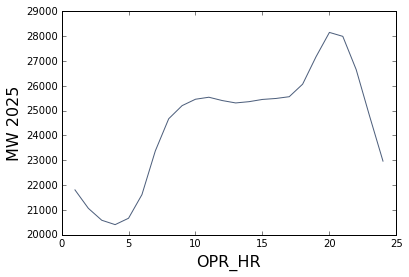

In [60]:
# your code/answer here

#Answer key
EV_avg_byhour['MW 2025'] = EV_avg_byhour['kW per veh mean']*1.5e6/1e3
EV_avg_byhour.plot('hour','MW 2025')
demand_avg_byhour['MW 2025'] = demand_avg_byhour['MW mean'] + EV_avg_byhour['MW 2025']

demand_avg_byhour.plot('OPR_HR', 'MW 2025')



## Forecasting renewable generation
CA also has a goal of 33% renewable energy by 2020 and 50% by 2030. Last week we discovered that for March 2016 12.5% of energy in CA came from renewables.

**Task:**<li>Let's say that to reach these goals we expect to have 40% renewable energy in 2025. If we keep the same proportion of wind and solar that exists today, by what percentage would we have to scale up the wind and solar generation from what it is today to achieve 40% renewable in 2025? <li>In the wind and solar tables, create columns called 'MW 2025' containing the hourly generation in 2025 if we multiply 'MW' by the scale factor found in the previous question.  


In [53]:
# Your code here

#Answer key
scale_factor = 40/12.5
wind_avg_byhour['MW 2025'] = wind_avg_byhour['MW mean']*scale_factor
solar_avg_byhour['MW 2025'] = solar_avg_byhour['MW mean']*scale_factor

## 2025 Energy from non-renewable sources:
**Tasks**<li> Add a column to demand_avg_by_hour called '2025 non-renewable MW' that contains the average hourly MW demand in 2025 that will not satisfied by our 2025 renewable predictions. <li> Plot the average non-renewable energy requirement vs. hour. 

**Questions** <li> One strategy that has been discussed as a strategy to eliminate the rapid fluctuations in demand on the grid is installing workstation charging stations and encouraging midday charging. After examining the plot of 2025 non-renewable demand, discuss why midday EV charging could help.

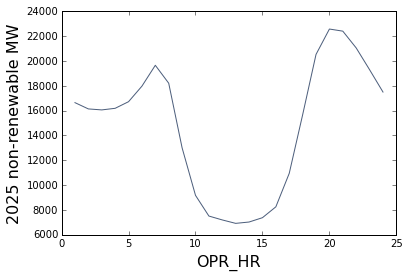

In [55]:
# Your code here

#Answer key
demand_avg_byhour['2025 non-renewable MW']=(demand_avg_byhour['MW 2025']-solar_avg_byhour['MW 2025']-wind_avg_byhour['MW 2025'])
demand_avg_byhour.plot('OPR_HR','2025 non-renewable MW')


In [ ]:
# Answer questions here.